# Modeling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import split_scale as ss
import evaluate as ev

## Lets load in the data on student grades

In [2]:
grades = pd.read_csv('exam_scores.csv')
grades = grades.set_index('student_id')
grades

,exam1,exam2,exam3,final_grade
student_id,,,,
1,100.0,90,95,96
2,98.0,93,96,95
3,85.0,83,87,87
4,83.0,80,86,85
5,93.0,90,96,97
...,...,...,...,...
100,70.0,65,78,77
101,62.0,70,79,70
102,58.0,65,70,68


### Next, lets split the data into train and test datasets.

In [3]:
train, test = ss.single_split_my_data(grades, 0.7, 13)
train

,exam1,exam2,exam3,final_grade
student_id,,,,
101,62.0,70,79,70
81,85.0,83,87,87
45,79.0,70,85,81
48,70.0,65,78,77
14,100.0,90,95,96
...,...,...,...,...
99,73.0,70,75,76
17,83.0,80,86,85
75,62.0,70,79,70


### Now we will create a model that uses exam 1 to predict the final grade.

In [4]:
X_train = train[['exam1']]
y_train = train[['final_grade']]

lm = LinearRegression()

lm.fit(X_train, y_train)

predictions = train[['final_grade']]

predictions['lm_exam1'] = lm.predict(X_train)
predictions

,final_grade,lm_exam1
student_id,,
101,70,69.367602
81,87,86.696910
45,81,82.176221
48,77,75.395187
14,96,97.998634
...,...,...
99,76,77.655532
17,85,85.190014
75,70,69.367602


### Lets also make a model that uses exam 2 to predict the final grade.

In [5]:
X_train = train[['exam2']]

lm.fit(X_train, y_train)

predictions['lm_exam2'] = lm.predict(X_train)
predictions

,final_grade,lm_exam1,lm_exam2
student_id,,,
101,70,69.367602,74.394493
81,87,86.696910,87.217751
45,81,82.176221,74.394493
48,77,75.395187,69.462471
14,96,97.998634,94.122582
...,...,...,...
99,76,77.655532,74.394493
17,85,85.190014,84.258538
75,70,69.367602,74.394493


### Now lets compare these two models

#### First lets compare their mean_squared errors

In [6]:
print("Mean Squared Error: ")
predictions.apply(lambda col: mean_squared_error(predictions.final_grade, col))

Mean Squared Error: 


final_grade     0.000000
lm_exam1        3.591013
lm_exam2       17.581647
dtype: float64

So we can see that exam1 is doing better

#### Next lets plot out the residuals

Text(0.5, 0.98, 'How well does exam 1 predict?')

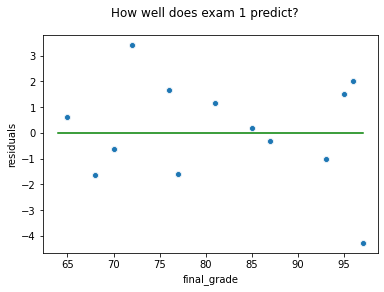

In [7]:
ev.rplot_residuals('final_grade', 'lm_exam1', predictions)
plt.suptitle("How well does exam 1 predict?")

Text(0.5, 0.98, 'How well does exam 2 predict?')

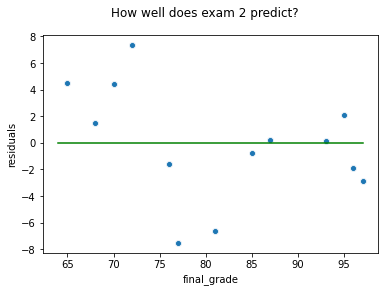

In [8]:
ev.rplot_residuals('final_grade', 'lm_exam2', predictions)
plt.suptitle("How well does exam 2 predict?")

#### Next lets plot the actual vs the predicted values

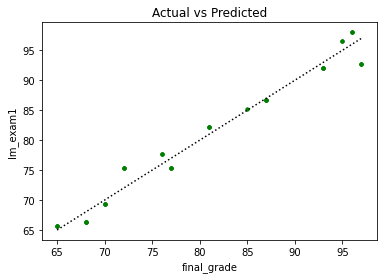

In [9]:
ev.plot_actual_vs_predicted('final_grade', 'lm_exam1', predictions)

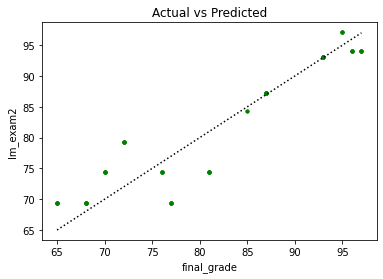

In [10]:
ev.plot_actual_vs_predicted('final_grade', 'lm_exam2', predictions)

### Next lets create a model that uses exam 1 and exam 3

In [ ]:
X_train = 